In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers
df = pd.read_csv('C:/Users/lsy/data1.csv')
df.head(10)

,formula,atomic_volume,band_gap,outer_electron,diff_electroneg,spacegroup,band_gap.is_direct
0,BaTe,44.545542,1.5930,16,1.21,m-3m,0
1,CCl4,30.166800,4.5130,11,0.61,2/m,0
2,BaO,21.478261,2.3711,8,2.55,6/mmm,0
3,Ba5Sb4,42.160101,0.2616,15,1.16,mmm,0
4,Ca2Sn,36.168984,0.6909,14,0.96,m-3m,0
5,Ca2Si,30.701680,0.5848,6,0.90,m-3m,0
6,Ca2Ge,31.355789,0.6088,14,1.01,m-3m,0
7,Ca2Pb,37.144004,0.6818,14,1.33,m-3m,0
8,AlSb,30.271563,0.9179,24,0.44,6mm,1
9,BaF2,20.669812,6.6232,9,3.09,m-3m,0


In [2]:
dftrain_raw = df.iloc[0:1500,:]
dftest_raw = df.iloc[1500:,:]

In [4]:
def preprocessing(dfdata):
    #preprocess the data 
    dfresult= pd.DataFrame()
    
    #set category column
    dfspacegroup = pd.get_dummies(dftrain_raw['spacegroup'])
    dfspacegroup.columns = ['group_' +str(x) for x in dfspacegroup.columns ]
    dfresult = pd.concat([dfresult,dfspacegroup],axis = 1)
    
    #set numerical columns
    dfresult['atomic_volume'] = dfdata['atomic_volume']
    dfresult['band_gap'] = dfdata['band_gap']
    dfresult['diff_electroneg'] = dfdata['diff_electroneg']
    dfresult['outer_electron'] = dfdata['outer_electron']

    return(dfresult)


x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['band_gap.is_direct'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['band_gap.is_direct'].values

In [7]:
#define keras model
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(15,activation = 'relu',input_shape=(34,)))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                525       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________


In [8]:
#train the model
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['AUC'])

history = model.fit(x_train,y_train,
                    batch_size= 75,
                    epochs= 30,
                    validation_split=0.2 
                   )

Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 502us/sample - loss: 1.5370 - AUC: 0.5025 - val_loss: 1.2147 - val_AUC: 0.4563
Epoch 2/30
1200/1200 [==============================] - 0s 16us/sample - loss: 0.7386 - AUC: 0.5275 - val_loss: 0.7736 - val_AUC: 0.4660
Epoch 3/30
1200/1200 [==============================] - 0s 16us/sample - loss: 0.6470 - AUC: 0.5315 - val_loss: 0.7353 - val_AUC: 0.4927
Epoch 4/30
1200/1200 [==============================] - 0s 17us/sample - loss: 0.6071 - AUC: 0.5391 - val_loss: 0.7394 - val_AUC: 0.4808
Epoch 5/30
1200/1200 [==============================] - 0s 18us/sample - loss: 0.5900 - AUC: 0.5473 - val_loss: 0.7103 - val_AUC: 0.4703
Epoch 6/30
1200/1200 [==============================] - 0s 16us/sample - loss: 0.5767 - AUC: 0.5601 - val_loss: 0.7064 - val_AUC: 0.4649
Epoch 7/30
1200/1200 [==============================] - 0s 16us/sample - loss: 0.5681 - AUC: 0.5601 - val_loss: 0.6791 - val_AUC: 

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#visualize the results
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

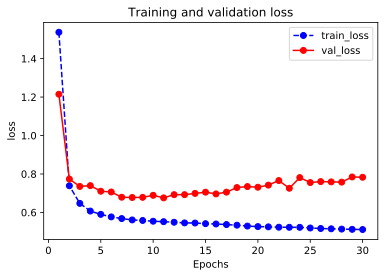

In [10]:
plot_metric(history,"loss")

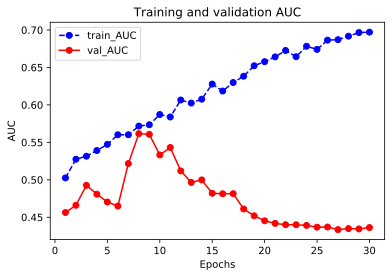

In [11]:
plot_metric(history,"AUC")